In [2]:
print("this is my first ML project in jupyter")

this is my first ML project in jupyter


In [3]:
import pandas as pd

data = pd.read_csv("dataset/diabetes.csv")
data.head()
data.isnull().sum()
data.describe()
data.duplicated().sum()

0

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
import joblib
model = LogisticRegression()
model.fit(X_train, y_train)

joblib.dump(model, "diabetes_model.pkl")

test_pred = model.predict([[5,4,2,5,6,2,2,22]])
test_pred[0]

/home/ratah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ratah/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring='f1').mean()

/home/ratah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ratah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.6283277386447943

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)
rf_test_pred = rf_model.predict(X_test)

rf_accuracy = recall_score(y_test, rf_test_pred)
print("Random Forest recall score:", rf_accuracy)

Random Forest recall score: 0.6909090909090909


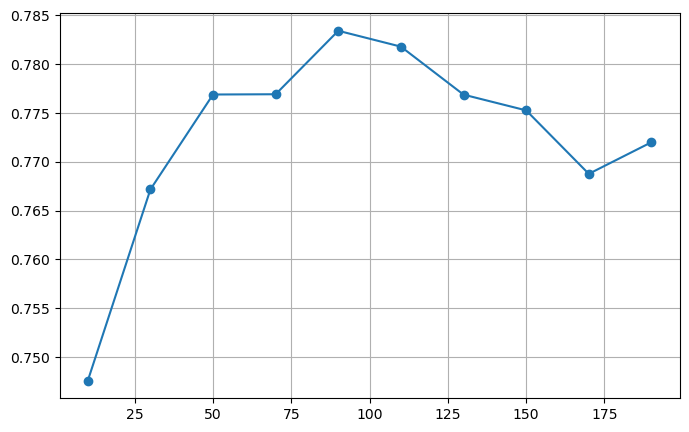

In [8]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

n_values = list(range(10, 210, 20))

# cross_val_score(RandomForestClassifier(n_estimator=
cross_score = []
for i in n_values:
    rf_m = RandomForestClassifier(n_estimators=i, random_state=42)
    c_v_m = cross_val_score(rf_m, X_train, y_train, cv=5, scoring='accuracy')
    cross_score.append(c_v_m.mean())

plt.figure(figsize=(8,5))
plt.plot(n_values, cross_score, marker='o')
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

n_values = list(range(10, 210, 20))
rf_m = RandomForestClassifier()

train_score, val_score = validation_curve(
    rf_m, X_train, y_train, param_name='n_estimators',
    param_range=n_values, cv=5, scoring='accuracy'
)

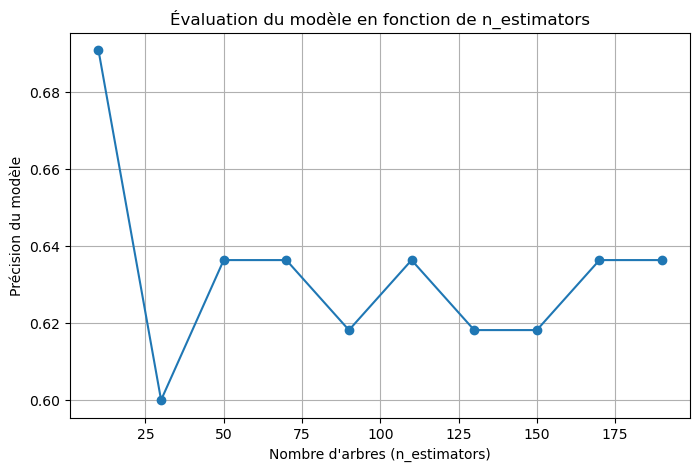

In [ ]:
import matplotlib.pyplot as plt

n_values = list(range(10, 210, 20))   # 10, 30, 50, ..., 190
accuracy_scores = []

for n in n_values:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = recall_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# 4. Tracer le graphique
plt.figure(figsize=(8,5))
plt.plot(n_values, accuracy_scores, marker='o')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("Précision du modèle")
plt.title("Évaluation du modèle en fonction de n_estimators")
plt.grid(True)
plt.show()